# Introduction: Animation Correlations

To calculate the correlations between Michael's animation videos and the video only videos, we must do three steps: 
1. Clean the datasets to remove participants who didn't perform as desired.
2. Average columnwise to get the average ratings of a specific animation/video in a vector form.
3. Calculate the correlation between the video_only condition and {mouth_only, eyes_only, and full_face} animation conditions.

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import re
from cleanavgcorr import ParticipantResults
import scipy.stats as st
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:955: UserWarning: Illegal line #1
	"backend=TkAgg"
	in file "/Users/MichaelSmith/.matplotlib/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)


# Read in CSV Files

We read in CSV's to four lists: face, eyes, mouth, and vid_only. Each list contains twelve tuples, corresponding to the twelve videos that we tested participants on. Each tuple is of format (video_id, class ParticipantResults). 

*For anim_directory*: give the path to the 'val_ratings_result' folder in the 'animation_results' folder.

*For vid_only_dir*: give the path to the 'videoOnly results' 

*For worker_info*: give the path to the worker_info.csv file

In [9]:
# anim_directory = os.fsencode('/Users/MichaelSmith/Desktop/new_animation_result/ratings')
# vid_only_dir = os.fsencode('/Users/MichaelSmith/Desktop/VideoOnly')
# worker_info = pd.read_csv('/Users/MichaelSmith/Desktop/new_animation_result/workers/worker_info_new.csv', sep=',')

anim_directory = os.fsencode('/Users/MichaelSmith/Desktop/Recent Desktop SSNL/new_animation_result/ratings')
vid_only_dir = os.fsencode('/Users/MichaelSmith/Desktop/Recent Desktop SSNL/VideoOnly')

#vid_only_dir = os.fsencode('/Users/MichaelSmith/Desktop/Full_vids') # this is the actual both conditions

worker_info = pd.read_csv('/Users/MichaelSmith/Desktop/Recent Desktop SSNL/new_animation_result/workers/worker_info_new.csv', sep=',')

face = {}
mouth = {}
eyes = {}
vid_only = {}

# FACE, EYES, MOUTH ANIMATION CONDITIONS
for file in os.listdir(anim_directory):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        vid_id = filename[:10]
        df = pd.read_csv(os.path.join(os.fsdecode(anim_directory), filename))
        if 'face' in filename:
            pr = ParticipantResults(vid_id + '_anim_face', df, worker_info)
            face[vid_id] = pr
        elif 'eyes' in filename:
            pr = ParticipantResults(vid_id + '_anim_eyes', df, worker_info)
            eyes[vid_id] = pr
        else:
            pr = ParticipantResults(vid_id + '_anim_mouth', df, worker_info)
            mouth[vid_id] = pr

# VIDEO ONLY CONDITION
for file in os.listdir(vid_only_dir):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        vid_id = filename[:10]
        df = pd.read_csv(os.path.join(os.fsdecode(vid_only_dir), filename))
        pr = ParticipantResults(vid_id, df, worker_info)
        vid_only[vid_id] = pr

In [10]:
face['ID118_vid3']

In [163]:
targets = {}

target_dir = os.fsencode('/Users/MichaelSmith/Desktop/target')

for file in os.listdir(target_dir):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        vid_id = filename[:10]
        if vid_id in vid_only:
            df = pd.read_csv(os.path.join(os.fsdecode(target_dir), filename))
            targets[vid_id] = df

In [165]:
for target in targets:
    print(target)

ID128_vid2
ID129_vid2
ID161_vid3
ID129_vid5
ID135_vid3
ID170_vid2
ID171_vid1
ID167_vid2
ID153_vid3
ID169_vid4
ID120_vid4
ID121_vid5
ID174_vid2
ID174_vid3
ID120_vid1
ID137_vid6
ID118_vid3
ID147_vid5
ID151_vid2
ID173_vid6
ID181_vid2
ID147_vid2
ID119_vid4
ID181_vid4


# Cleaning and Averaging
First, we need to clean the CSV files before we can average the participants' ratings. The type of cleaning depends on
the CSV. 

##### Removal Conditions:
For the animation CSVs (only), we have information on the attention of the participants (time spent on the tab = i.e. 1 - time on other tab(s)); if attention falls below 75% **(subject to change)**, we remove that participant's trial results. For both the video-only and animation conditions, we remove a participant's trial if they do not move the slider bar at least three times **(subject to change)**. These variables can be changed in the ParticipantResults class.

This leaves us with datasets of size (num_participants x time).
##### Averaging:
We average each dataset columnwise, across participants.

In [11]:
# We can call clean as many times as possible - but cleaning only works once. Same with averaging.
for key in vid_only:
    face[key].clean()
    face[key].compute_average()
    eyes[key].clean()
    eyes[key].compute_average()
    mouth[key].clean()
    mouth[key].compute_average()
    vid_only[key].clean(anim=False)
    vid_only[key].compute_average()
    print()

Num people thrown out for video ID173_vid6_anim_face: 4 out of 37 participants
Num people thrown out for video ID173_vid6_anim_eyes: 2 out of 26 participants
Num people thrown out for video ID173_vid6_anim_mouth: 3 out of 27 participants
Num people thrown out for video ID173_vid6: 9 out of 59 participants

Num people thrown out for video ID120_vid1_anim_face: 6 out of 35 participants
Num people thrown out for video ID120_vid1_anim_eyes: 2 out of 23 participants
Num people thrown out for video ID120_vid1_anim_mouth: 6 out of 32 participants
Num people thrown out for video ID120_vid1: 5 out of 64 participants

Num people thrown out for video ID174_vid2_anim_face: 5 out of 34 participants
Num people thrown out for video ID174_vid2_anim_eyes: 4 out of 24 participants
Num people thrown out for video ID174_vid2_anim_mouth: 4 out of 32 participants
Num people thrown out for video ID174_vid2: 10 out of 69 participants

Num people thrown out for video ID151_vid2_anim_face: 9 out of 30 participa

In [12]:
print(len(eyes['ID118_vid3'].modded_df.index) / len(eyes['ID118_vid3'].orig_df.index))

0.8064516129032258


In [13]:
sum = 0.0
for key in vid_only:
    sum += len(vid_only[key].modded_df.index) / len(vid_only[key].orig_df.index)
print(sum/len(vid_only))

0.8431278472799235


In [92]:
# in this cell -- we calculate the in-group correlations

from scipy.stats import pearsonr, spearmanr

corr_dict = {}

#for key1 in vid_only:
#    print(vid_only[key1].orig_df.shape)

ex_arry = vid_only[key].modded_df.values
ex_arry = ex_arry[:, 1:]

divisor = ex_arry.shape[0] # 50

big = 0

for row_ind in range(ex_arry.shape[0]):
    leave_out = ex_arry[row_ind, :]
    rest = np.vstack((ex_arry[:row_ind, :], ex_arry[row_ind+1:, :]))
    
    indiv_corr = 0
    for row2_ind in range(rest.shape[0]):
        indiv_corr += np.arctanh(pearsonr(leave_out, rest[row2_ind])[0])
        
    big += indiv_corr/(divisor-1)

        
        
print(np.tanh(big/divisor)) # probabilistic space transform...

            

0.21264300459055827


In [173]:
#targets['ID128_vid2'].drop('time', axis=1, inplace=True)

for target in targets:
    if 'time' in targets[target].columns:
       targets[target].drop('time', axis=1, inplace=True)
    targets[target] = targets[target].values.reshape((targets[target].shape[0],))



In [185]:
vid_only_modded = {}
targs_modded = {}
face_modded = {}
mouth_modded = {}
eyes_modded = {}


for target in targets:
    min_len = min(targets[target].shape[0], vid_only[target].average_df.shape[0], 
                  face[target].average_df.shape[0], mouth[target].average_df.shape[0],
                 eyes[target].average_df.shape[0])
    targs_modded[target] = pd.DataFrame(targets[target][:min_len])
    vid_only_modded[target] = vid_only[target].average_df[:min_len]
    face_modded[target] = face[target].average_df[:min_len]
    mouth_modded[target] = mouth[target].average_df[:min_len]
    eyes_modded[target] = eyes[target].average_df[:min_len]
    



In [186]:
# do some correlation with targets instead...

In [207]:
total_face = []
face_pear_corr_vals = []

total_mouth = []
mouth_pear_corr_vals = []

total_eyes = []
eyes_pear_corr_vals = []

dict_we_wanna_use = targs_modded
div = len(dict_we_wanna_use)

for key in dict_we_wanna_use:
    sha = targs_modded[key].shape[0]
    f = face_modded[key].values
    m = mouth_modded[key].values
    e = eyes_modded[key].values
    t = targs_modded[key].values.reshape((sha,))
    
    face_corr = pearsonr(f, t)[0]
    total_face.append(np.arctanh(face_corr))
    face_pear_corr_vals.append(face_corr)
    
    mouth_corr = pearsonr(m, t)[0]
    total_mouth.append(np.arctanh(mouth_corr))
    mouth_pear_corr_vals.append(mouth_corr)
    
    eyes_corr = pearsonr(e, t)[0]
    total_eyes.append(np.arctanh(eyes_corr))
    eyes_pear_corr_vals.append(eyes_corr)
    print('For video %s: corr\'s btwn video_only and face, mouth, and eyes are: %5f, %5f, %5f' % (key, face_corr, mouth_corr, eyes_corr))
    
print('Average Face Correlation: ', np.tanh(np.sum(total_face)/div))
print('Average Mouth Correlation: ', np.tanh(np.sum(total_mouth)/div))
print('Average Eyes Correlation: ', np.tanh(np.sum(total_eyes)/div))

For video ID128_vid2: corr's btwn video_only and face, mouth, and eyes are: -0.652790, 0.375794, 0.160735
For video ID129_vid2: corr's btwn video_only and face, mouth, and eyes are: 0.097002, -0.359360, 0.202503
For video ID161_vid3: corr's btwn video_only and face, mouth, and eyes are: 0.757693, 0.657542, 0.017129
For video ID129_vid5: corr's btwn video_only and face, mouth, and eyes are: -0.540616, -0.145447, -0.929643
For video ID135_vid3: corr's btwn video_only and face, mouth, and eyes are: 0.231837, -0.209989, -0.768572
For video ID170_vid2: corr's btwn video_only and face, mouth, and eyes are: 0.227392, 0.286742, -0.580640
For video ID171_vid1: corr's btwn video_only and face, mouth, and eyes are: -0.219867, -0.018824, -0.503290
For video ID167_vid2: corr's btwn video_only and face, mouth, and eyes are: -0.434347, -0.037496, 0.197091
For video ID153_vid3: corr's btwn video_only and face, mouth, and eyes are: 0.426130, 0.564521, 0.852168
For video ID169_vid4: corr's btwn video_on

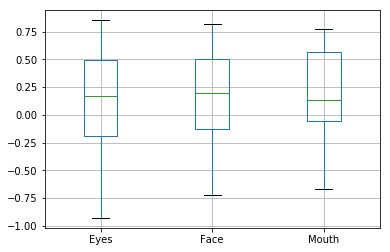

In [208]:
pd.DataFrame({'Face':face_pear_corr_vals, 'Mouth':mouth_pear_corr_vals, 'Eyes':eyes_pear_corr_vals}).boxplot(column=['Eyes', 'Face', 'Mouth'])

In [101]:
for key in vid_only:
    curr_arr = vid_only[key].modded_df.values[:, 1:] # to get rid of participant id's
    divisor = curr_arr.shape[0]
    
    overall_corr = 0
    
    for row_ind in range(divisor):
        leave_out = curr_arr[row_ind, :]
        rest = np.vstack((curr_arr[:row_ind, :], curr_arr[row_ind+1:, :]))
        
        indiv_corr = 0
        for row2_ind in range(rest.shape[0]):
            indiv_corr += np.arctanh(pearsonr(leave_out, rest[row2_ind])[0])
            
        overall_corr += indiv_corr/(divisor-1)
        
    corr_dict[key] = np.tanh(overall_corr/divisor)
    

In [210]:
top12 = {}
bottom12 = {}
mid12 = {}

top6 = {}
bottom6 = {}

allofthem = []

for key in corr_dict:
    
    allofthem.append(corr_dict[key])
    
    if corr_dict[key] > .40:
        top6[key] = corr_dict[key]
        
    if corr_dict[key] <= .40 and corr_dict[key] >= .2476:
        mid12[key] = corr_dict[key]
        
    if corr_dict[key] < .2476:
        bottom6[key] = corr_dict[key]
    
    if corr_dict[key] > .33:
        #print(corr_dict[key])
        top12[key] = corr_dict[key]
    else:
        bottom12[key] = corr_dict[key]
        
print(sorted(allofthem))
print(len(mid12))

[0.09663977578392621, 0.19360972526154518, 0.21264300459055827, 0.22249030853734872, 0.2451487477151972, 0.24755847812442755, 0.24771655072178564, 0.28574609684478347, 0.28637124982607104, 0.29042670946295535, 0.3044029483380661, 0.32514147693337236, 0.33318216068570816, 0.35349735327689585, 0.371302249262075, 0.3841453530853013, 0.3892237850333407, 0.39829868442808375, 0.4010052360531072, 0.40381911335349197, 0.4414683122409104, 0.4617216651926436, 0.4856065119106889, 0.5898832057912969]
12


# Correlating

For each of the three conditions ({eyes_only, jaw/mouth_only, full_face}), we correlate with the video_only condition for each video before averaging across all videos. We use pearson's r for correlating.

In [211]:
total_face = []
face_pear_corr_vals = []

total_mouth = []
mouth_pear_corr_vals = []

total_eyes = []
eyes_pear_corr_vals = []

dict_we_wanna_use = mid12

div = len(dict_we_wanna_use)

for key in dict_we_wanna_use:
    face_corr = face[key].average_df.corr(vid_only[key].average_df)
    total_face.append(np.arctanh(face_corr))
    face_pear_corr_vals.append(face_corr)
    
    mouth_corr = mouth[key].average_df.corr(vid_only[key].average_df)
    total_mouth.append(np.arctanh(mouth_corr))
    mouth_pear_corr_vals.append(mouth_corr)
    
    eyes_corr = eyes[key].average_df.corr(vid_only[key].average_df)
    total_eyes.append(np.arctanh(eyes_corr))
    eyes_pear_corr_vals.append(eyes_corr)
    print('For video %s: corr\'s btwn video_only and face, mouth, and eyes are: %5f, %5f, %5f' % (key, face_corr, mouth_corr, eyes_corr))
    
print('Average Face Correlation: ', np.tanh(np.sum(total_face)/div))
print('Average Mouth Correlation: ', np.tanh(np.sum(total_mouth)/div))
print('Average Eyes Correlation: ', np.tanh(np.sum(total_eyes)/div))


    

For video ID173_vid6: corr's btwn video_only and face, mouth, and eyes are: 0.758982, -0.125961, 0.005120
For video ID120_vid1: corr's btwn video_only and face, mouth, and eyes are: 0.820400, 0.231546, -0.164377
For video ID174_vid2: corr's btwn video_only and face, mouth, and eyes are: 0.548788, 0.342210, -0.505821
For video ID135_vid3: corr's btwn video_only and face, mouth, and eyes are: -0.264098, 0.554585, 0.690425
For video ID147_vid5: corr's btwn video_only and face, mouth, and eyes are: -0.193039, 0.391303, -0.073037
For video ID181_vid4: corr's btwn video_only and face, mouth, and eyes are: 0.860411, 0.907085, -0.127113
For video ID137_vid6: corr's btwn video_only and face, mouth, and eyes are: 0.188076, 0.164637, -0.440402
For video ID118_vid3: corr's btwn video_only and face, mouth, and eyes are: 0.076164, -0.195537, -0.337808
For video ID147_vid2: corr's btwn video_only and face, mouth, and eyes are: 0.049605, 0.588132, -0.227755
For video ID170_vid2: corr's btwn video_only

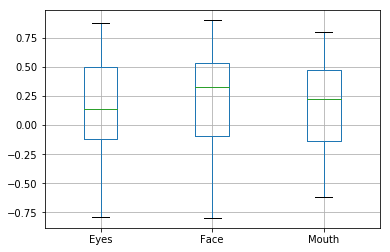

In [8]:
pd.DataFrame({'Face':face_pear_corr_vals, 'Mouth':mouth_pear_corr_vals, 'Eyes':eyes_pear_corr_vals}).boxplot(column=['Eyes', 'Face', 'Mouth'])